[*********************100%***********************]  1 of 1 completed


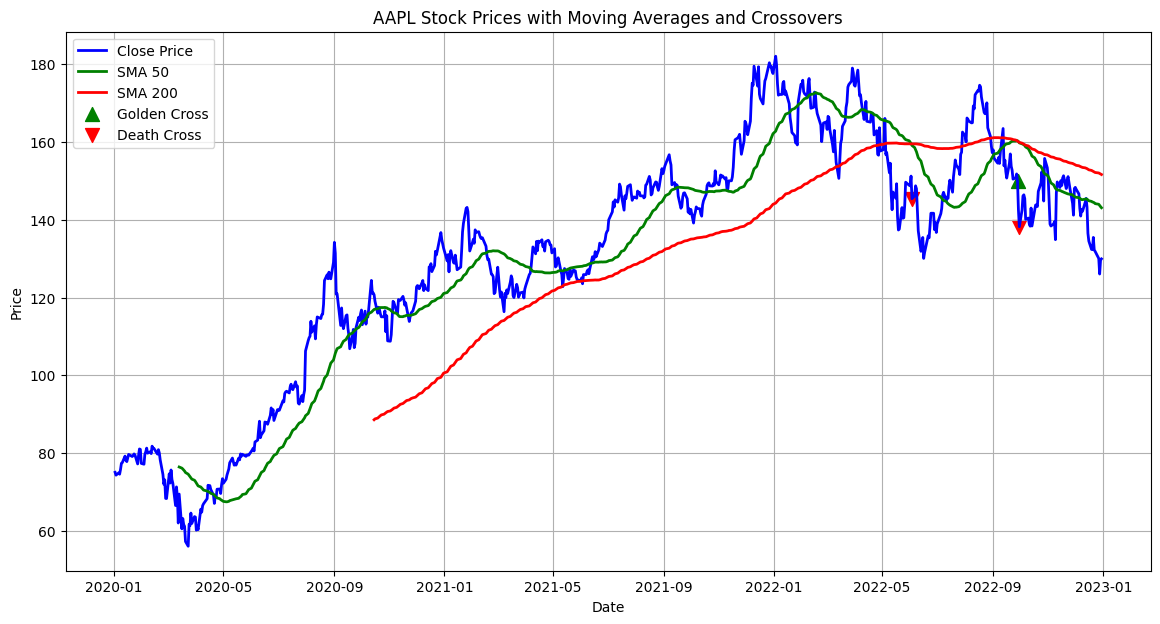

In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch stock data
def fetch_stock_data(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data

# Calculate moving averages
def calculate_moving_averages(data, sma50_length, sma200_length):
    data['SMA_50'] = data['Close'].rolling(window=sma50_length).mean()
    data['SMA_200'] = data['Close'].rolling(window=sma200_length).mean()
    return data

# Plot stock prices and moving averages
def plot_data_with_crossovers(data, stock_symbol):
    plt.figure(figsize=(14, 7))
    
    # Plot closing price and moving averages
    plt.plot(data['Close'], label='Close Price', color='blue', linewidth=2)
    plt.plot(data['SMA_50'], label='SMA 50', color='green', linewidth=2)
    plt.plot(data['SMA_200'], label='SMA 200', color='red', linewidth=2)
    
    # Identify crossovers
    golden_cross = (data['SMA_50'] > data['SMA_200']) & (data['SMA_50'].shift(1) <= data['SMA_200'].shift(1))
    death_cross = (data['SMA_50'] < data['SMA_200']) & (data['SMA_50'].shift(1) >= data['SMA_200'].shift(1))
    
    # Plot crossover points
    plt.scatter(data.index[golden_cross], data['Close'][golden_cross], label='Golden Cross', color='green', marker='^', s=100)
    plt.scatter(data.index[death_cross], data['Close'][death_cross], label='Death Cross', color='red', marker='v', s=100)
    
    # Add title, legend, and grid
    plt.title(f'{stock_symbol} Stock Prices with Moving Averages and Crossovers')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

# Main function
def main():
    # Stock details
    stock_symbol = "AAPL"  # Replace with your stock symbol
    start_date = "2020-01-01"
    end_date = "2023-01-01"
    sma50_length = 50  # Length of SMA 50
    sma200_length = 200  # Length of SMA 200
    
    # Fetch historical stock data
    data = fetch_stock_data(stock_symbol, start_date, end_date)
    
    if data.empty:
        print(f"No data found for {stock_symbol}.")
        return
    
    # Calculate moving averages
    data = calculate_moving_averages(data, sma50_length, sma200_length)
    
    # Plot data with crossovers
    plot_data_with_crossovers(data, stock_symbol)

# Run the script
if __name__ == "__main__":
    main()
